In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values   # Labels
    return X, y

In [3]:
def plot_data_distribution(y):
    plt.figure(figsize=(10, 6))
    sns.countplot(y)
    plt.title("Class Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Frequency")
    plt.show()

In [4]:
def plot_feature_correlations(data):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.title("Feature Correlations")
    plt.show()

In [6]:
def plot_feature_importances(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
    plt.show()

In [7]:
if __name__ == "__main__":
    data_file_path = r'C:\Users\91767\OneDrive\Documents\fdata_w.csv' 
    
    # Load data
    X, y = load_data(data_file_path)

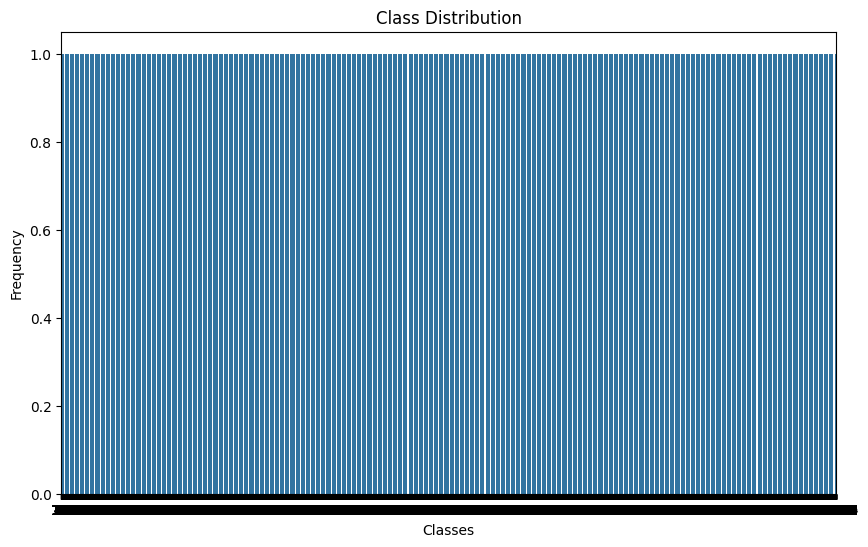

In [8]:
plot_data_distribution(y)

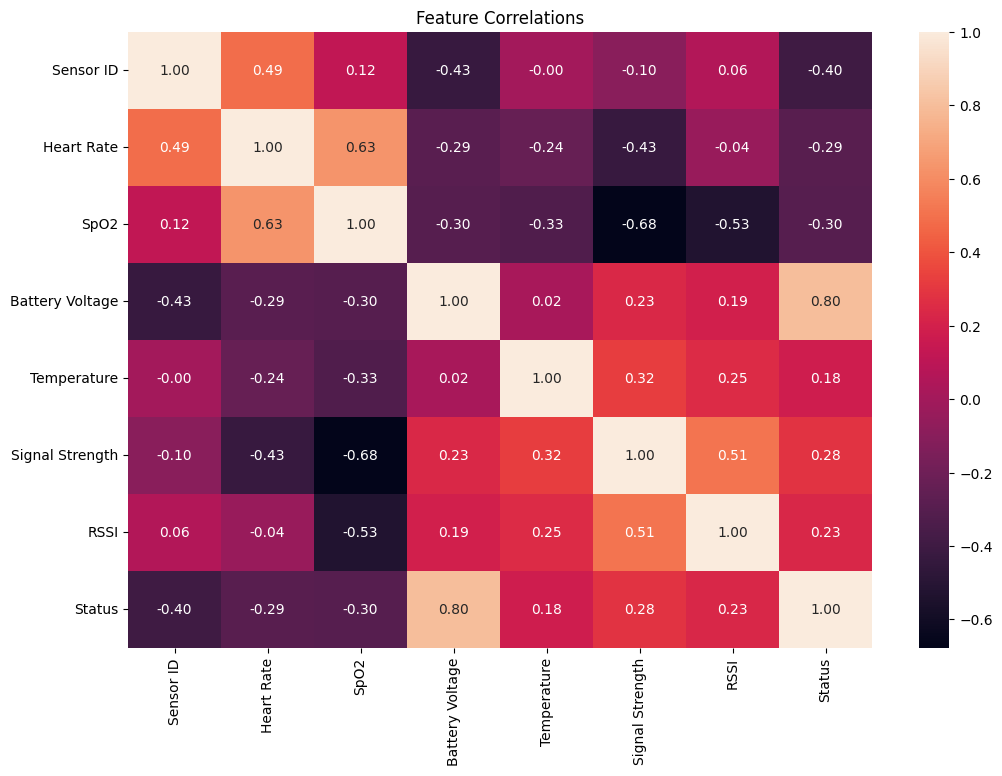

In [10]:
data = pd.read_csv(data_file_path)
plot_feature_correlations(data)

In [11]:
y = pd.factorize(y)[0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = rf_model.predict(X_test_scaled)

In [15]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3646
           2       1.00      1.00      1.00       569
           3       1.00      1.00      1.00      1706

    accuracy                           1.00      5921
   macro avg       1.00      1.00      1.00      5921
weighted avg       1.00      1.00      1.00      5921

Accuracy: 1.0


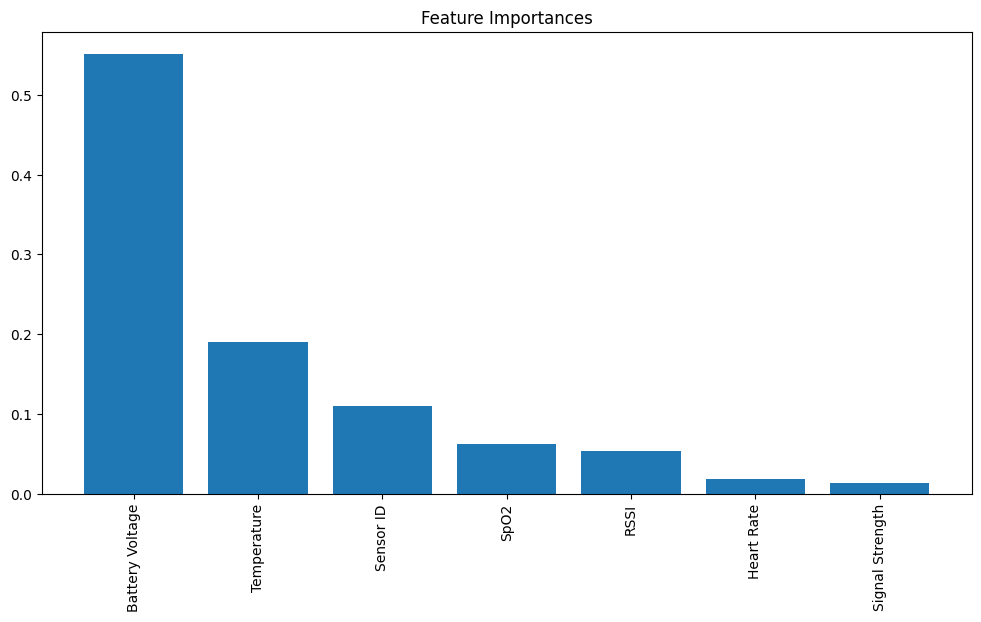

In [16]:
feature_names = data.columns[:-1]
plot_feature_importances(rf_model, feature_names)